In [ ]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Imports for the project
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)

from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from fast_ml.model_development import train_valid_test_split

TensorFlow version: 2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creating the dataframe from the .csv file and printing an overview of it
data = pd.read_csv("/content/drive/MyDrive/heart.csv")
df = pd.DataFrame(data)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
categorical_columns = [column for column in df.columns if (df[column].dtype != 'int64' and df[column].dtype != 'float64' )]
print(categorical_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
numeric_columns = [column for column in df.columns if (df[column].dtype == 'int64' or df[column].dtype == 'float64' )]
print(numeric_columns)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [ ]:
print(df.Sex.unique())
print(df.ChestPainType.unique())
print(df.RestingECG.unique())
print(df.ExerciseAngina.unique())
print(df.ST_Slope.unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [ ]:
df = df.replace({'Sex':{'M':1,'F':0}})
df = df.replace({'ExerciseAngina':{'N':1,'Y':0}})

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,1,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,1,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,0,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,1,0.0,Up,0


In [ ]:
categorical_columns = [column for column in df.columns if (df[column].dtype != 'int64' and df[column].dtype != 'float64' )]
print(categorical_columns)

['ChestPainType', 'RestingECG', 'ST_Slope']


In [ ]:
le = LabelEncoder()
df_lab = df.copy()

df_lab.ChestPainType = le.fit_transform(df.ChestPainType)
df_lab.RestingECG = le.fit_transform(df.RestingECG)
df_lab.ST_Slope = le.fit_transform(df.ST_Slope)

In [ ]:
df_lab.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,2,0
1,49,0,2,160,180,0,1,156,1,1.0,1,1
2,37,1,1,130,283,0,2,98,1,0.0,2,0
3,48,0,0,138,214,0,1,108,0,1.5,1,1
4,54,1,2,150,195,0,1,122,1,0.0,2,0


In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_lab, target = "HeartDisease", 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)
print("X_train: " + str(X_train.shape) + " " + ", y_train: " + str(y_train.shape))
print("X_valid: " + str(X_valid.shape) + ", y_valid: " + str(y_valid.shape))
print("X_test: " + str(X_test.shape) + ", y_test: " + str(y_test.shape))

X_train: (642, 11) , y_train: (642,)
X_valid: (138, 11), y_valid: (138,)
X_test: (138, 11), y_test: (138,)


In [ ]:
# Scale the data so the regression model have an easier time understanding and learning
from sklearn.preprocessing import StandardScaler , MinMaxScaler, Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(n_estimators = 200,max_depth=10, random_state=0).fit(X_train, y_train)
rfc_pred = clf_rfc.predict(X_test)
rfc_score = clf_rfc.score(X_test, y_test)

print(rfc_score)

0.8623188405797102


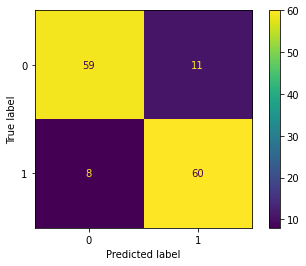

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_rfc, X_test, y_test)

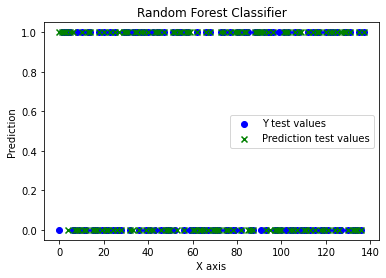

In [ ]:
import matplotlib.pyplot as plt
plt.title("Random Forest Classifier")
plt.xlabel("X axis")
plt.ylabel("Prediction")
xx = np.array(range(0, len(rfc_pred)))
plt.scatter(xx, y_test, color = "blue", marker = "o", label = "Y test values")
plt.scatter(xx, rfc_pred, color = "green", marker = "x", label = "Prediction test values")
plt.legend()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=0, max_iter=200).fit(X_train, y_train)
mpl_pred = clf_mlp.predict(X_test)
mpl_score = clf_mlp.score(X_test, y_test)

print(mpl_score)

0.7391304347826086


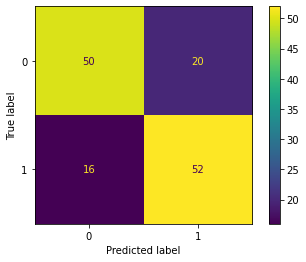

In [ ]:
plot_confusion_matrix(clf_mlp, X_test, y_test)

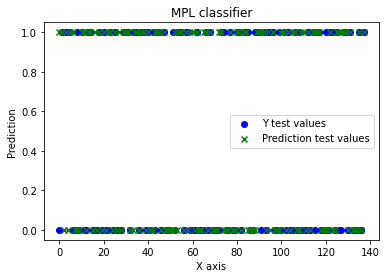

In [ ]:
plt.title("MPL classifier")
plt.xlabel("X axis")
plt.ylabel("Prediction")
xx = np.array(range(0, len(mpl_pred)))
plt.scatter(xx, y_test, color = "blue", marker = "o", label = "Y test values")
plt.scatter(xx, mpl_pred, color = "green", marker = "x", label = "Prediction test values")
plt.legend()
plt.show()